### K-means clustering

 - An unsuperivsed algorithm
 - Very useful when you ignore the number of "true" clusters in the data (so when you're dealing with "unlabeled" data)
 - K-means partitions n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid)
 - Cluster evaluation:
     - The inertia attribute measures how spread out the clusters are
     - How spread out the samples within each cluster are
     - Intuition: measure the distance of each sample from the cluster's centroid
     - Clusters should not be far spread out so low intertia values are better
     - k-means attempts to minimize inertia when choosing clusters
 - More clusters give lower inertia, but inertia decreases more slowly with the number of clusters
 - So good clustering has tight but not too many clusters
 - Rule of thumb: select the number of clusters that corresponds to the "elbow" in the inertia plot (this is where the rate of inertia decrease is significantly lower than the previous cluster/inertia combination)
 - In K-means clustering, the variance of a feature corresponds to its influence on the clustering algorithm, so you must first scale your data (transform so that the features have equal variance
 - Learn more: https://en.wikipedia.org/wiki/K-means_clustering

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [58]:
wines = load_wine()
features = pd.DataFrame(wines['data'], columns = wines['feature_names'])

target = pd.DataFrame(wines['target'], columns=['type'])

df = pd.concat([target,features],axis=1)
df.shape

(178, 14)

#### Trying out KMeans

In [87]:
# Wine varieties
varieties = target.iloc[:,0]

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(features)

# Calculate the cluster labels: labels
labels = pipeline.predict(features)

# Create a DataFrame with labels and species as columns: df
ct = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct_show = pd.crosstab(ct['labels'], ct['varieties'])

# Display ct
print(ct_show)


varieties   0   1   2
labels               
0           0  65   0
1          59   3   0
2           0   3  48


#### With train-test-split

In [110]:
features = pd.DataFrame(scale(wines['data']), columns = wines['feature_names'])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=242)

In [111]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)

# Print cluster labels of new_points
print(labels)



[0 1 2 1 2 1 0 1 0 0 1 2 0 0 1 2 0 2 0 0 2 1 0 1 1 1 0 1 2 2 0 2 0 2 2 1 1
 1 2 2 2 1 1 2 0 2 1 2 2 1 0 0 1 2]


'Centroids'

(3, 13)

array([[ 0.13717456,  0.83286834,  0.2188527 ,  0.51700753, -0.11838092,
        -0.95935351, -1.20430571,  0.75279123, -0.88053711,  0.80023961,
        -1.06858263, -1.26220104, -0.46052709],
       [ 0.90098006, -0.24138741,  0.30515936, -0.7457025 ,  0.5047398 ,
         0.93047648,  0.95240029, -0.58648069,  0.50082503,  0.14820185,
         0.42849751,  0.85034077,  1.08425272],
       [-0.89646772, -0.3410257 , -0.75488951,  0.00618939, -0.52951904,
        -0.10931662, -0.0133223 , -0.1725135 ,  0.07006587, -0.91372281,
         0.57432948,  0.30929853, -0.73506584]])

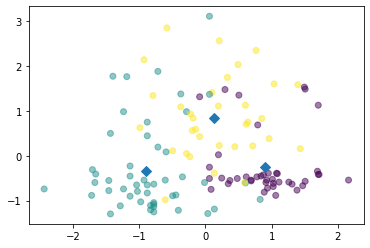

In [117]:
# Assign the columns of new_points: xs and ys

xs = X_train.iloc[:,0]
ys = X_train.iloc[:,1]
labels = y_train.iloc[:,0]

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
display('Centroids', centroids.shape, centroids)

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


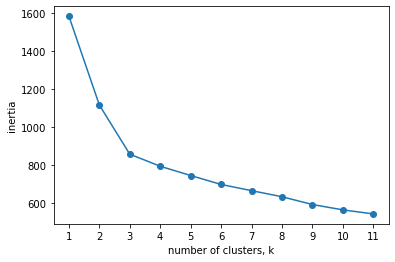

In [118]:
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


#### Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - e.g. stock prices - independently of the other.

Cluster companies by their daily stock price movements - So which company stock prices tend to change in the same way?

In [166]:
etfs = pd.read_csv('ml_assets/etfs.csv',index_col='Dates')
movements = etfs.pct_change(1).dropna(axis=0).T.iloc[:,1:]

In [188]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 6 clusters: kmeans
kmeans = KMeans(n_clusters=7)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

In [189]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'etfs': list(movements.index)})

df.sort_values('labels')['labels'].value_counts()

0    33
5    17
4    15
6    10
2     7
1     5
3     3
Name: labels, dtype: int64

In [191]:
for i in set(df['labels']):
    display('Cluster '+ str(i), df[df['labels']==i]['etfs'].values)

'Cluster 0'

array(['IUSN', 'SWDA', 'EXXT', 'QDVE', 'WCOD', 'QDVK', '2B77', 'RBOT',
       'IH2O', 'SMH', 'CSNKY', 'EUNI', 'IUS3', 'HYLD', 'IWQU', 'IWSZ',
       'GMVM', 'AYEW', 'IWMO', 'IUSA', 'WTEL', 'XLIS', 'XLBS', 'XLKS',
       'XLYS', 'IU5C', 'WMAT', 'WTCH', 'SPYY', 'VWCE', 'WIND', 'MOAT',
       'PORT'], dtype=object)

'Cluster 1'

array(['IGLT', 'AGGH', 'IEAC', 'IEAG', 'SEGA'], dtype=object)

'Cluster 2'

array(['EUNX', 'IBTS', 'IBTM', 'IEMB', 'LQDE', 'CORP', 'IHYU'],
      dtype=object)

'Cluster 3'

array(['WNRG', 'XLES', 'EXH1'], dtype=object)

'Cluster 4'

array(['WFIN', 'EXS1', 'ISF', 'EMBE', 'QDVH', 'ECAR', 'DJSC', 'EXV5',
       'EXV1', 'IWVL', 'EUN2', 'XLFS', 'EXV3', 'EXSA', 'EXV9'],
      dtype=object)

'Cluster 5'

array(['WCLD', 'VOLT', '2B70', 'DGTL', 'HEAL', 'CEMG', 'DAVV', 'L0CK',
       'ESP0', 'WELL', 'ITEK', 'UNIC', 'HDRO', 'WCBR', 'EIMI', 'WTAI',
       'INRG'], dtype=object)

'Cluster 6'

array(['WCOS', 'IWDP', 'CBUF', 'MVOL', 'XLPS', 'XLVS', 'XLUS', 'WHEA',
       'QDVG', 'WUTI'], dtype=object)